<a href="https://colab.research.google.com/github/TatarinovaEM758/Machine_learning/blob/main/ML_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод ближайших соседей
Цель работы:

Изучить работу класса KNeighborsClassifier библиотеки Scikit-Learn, реализующего метод K ближайших соседей для классификации.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

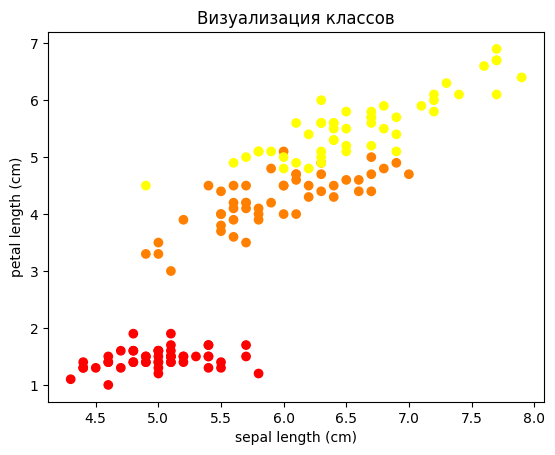

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

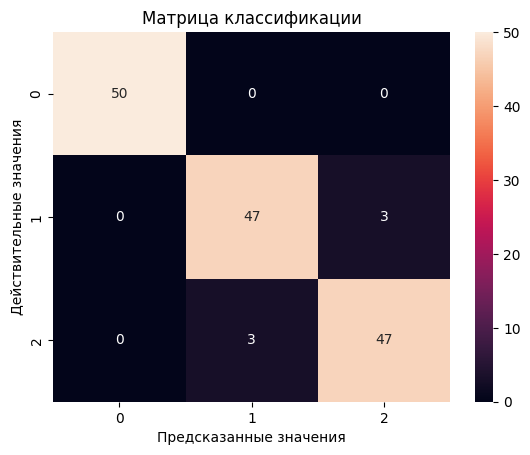

In [7]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [8]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [9]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [10]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


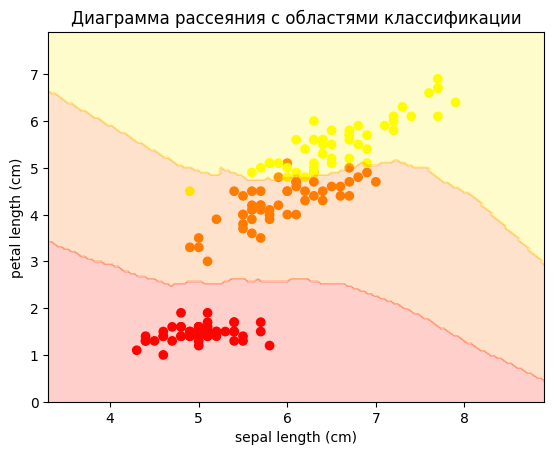

In [11]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [12]:
observation_new = [[5.5, 5]]

In [13]:
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [15]:
distances, indices = knn.kneighbors(observation_new_scaled)

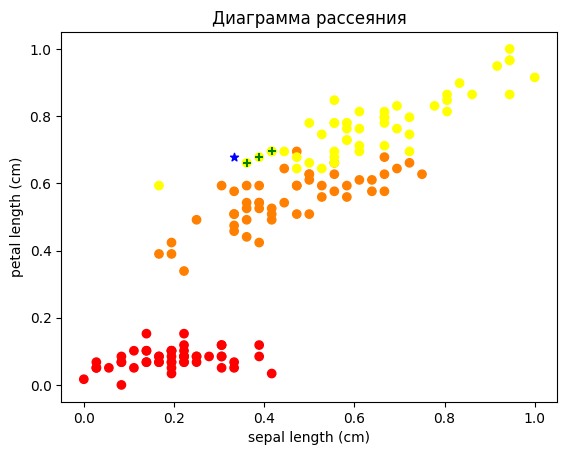

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# Задания для самостоятельного выполнения

## 1. Постройте последний график методических указаний в исходном пространстве признаков.

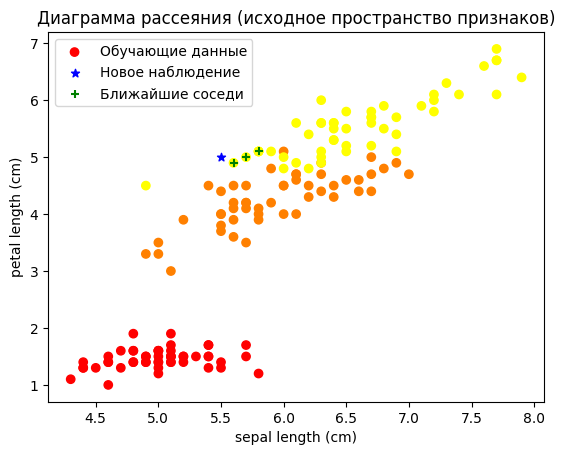

In [17]:
# Загрузка данных
iris = load_iris()
features = iris.data
data = pd.DataFrame(features, columns=iris.feature_names)

# Выбор признаков
X = data.iloc[:, [0, 2]].values  # В исходном пространстве признаков
y = iris.target

# Масштабирование
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Обучение KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Новый объект для классификации
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

# Найти соседей
distances, indices = knn.kneighbors(observation_new_scaled)

# Построение графика в исходном пространстве признаков
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', label='Обучающие данные')

# Новый объект
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b', label='Новое наблюдение')

# Соседи в исходном пространстве
plt.scatter(X[indices[0]][0][0], X[indices[0]][0][1], marker='+', color='g', label='Ближайшие соседи')
plt.scatter(X[indices[0]][1][0], X[indices[0]][1][1], marker='+', color='g')
plt.scatter(X[indices[0]][2][0], X[indices[0]][2][1], marker='+', color='g')

# Настройка графика
plt.title("Диаграмма рассеяния (исходное пространство признаков)")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()


## 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

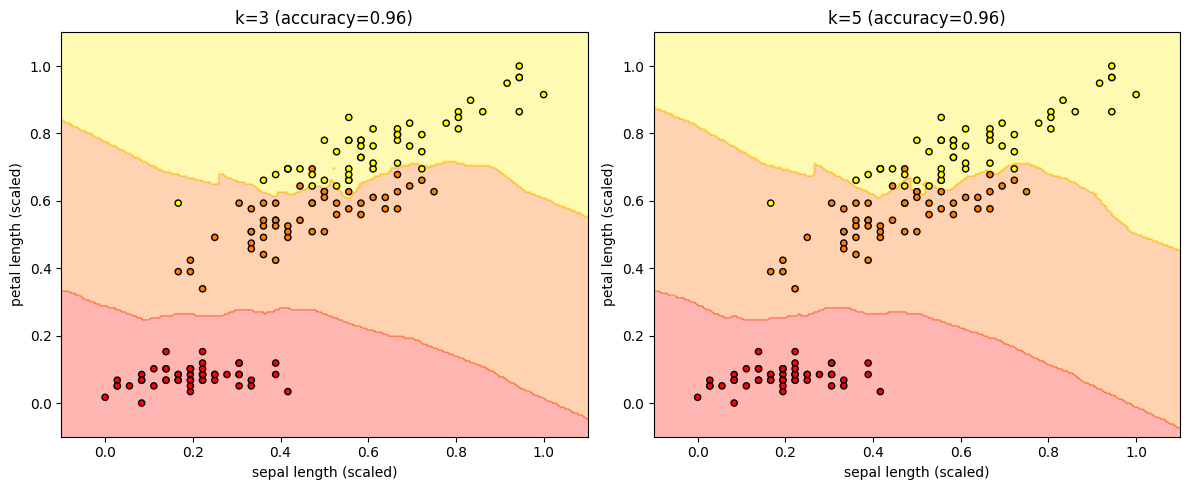

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Обучение модели с k=3
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train, y_train)

# Обучение модели с k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)

# Построение сетки для визуализации областей классификации
X0 = np.linspace(X_scaled[:, 0].min()-0.1, X_scaled[:, 0].max()+0.1, 200)
X1 = np.linspace(X_scaled[:, 1].min()-0.1, X_scaled[:, 1].max()+0.1, 200)
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX_scaled = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

# Предсказания для каждой модели
Z_k3 = knn_k3.predict(XX_scaled).reshape(X0_grid.shape)
Z_k5 = knn_k5.predict(XX_scaled).reshape(X0_grid.shape)

# Оценка точности на тестовой выборке
accuracy_k3 = accuracy_score(y_test, knn_k3.predict(X_test))
accuracy_k5 = accuracy_score(y_test, knn_k5.predict(X_test))

# Визуализация областей классификации
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = [f"k=3 (accuracy={accuracy_k3:.2f})", f"k=5 (accuracy={accuracy_k5:.2f})"]
Zs = [Z_k3, Z_k5]
knns = [knn_k3, knn_k5]

for ax, Z, title in zip(axes, Zs, titles):
    ax.contourf(X0_grid, X1_grid, Z, alpha=0.3, cmap='autumn')
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', edgecolor='k', s=20)
    ax.set_title(title)
    ax.set_xlabel("sepal length (scaled)")
    ax.set_ylabel("petal length (scaled)")

plt.tight_layout()
plt.show()

## 3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

In [19]:
# Новое наблюдение за пределами области определения
observation_outside = [[9, 7]]

# Нормализация нового наблюдения
observation_outside_scaled = scaler.transform(observation_outside)

# Вывод результата
print(f"Исходное наблюдение: {observation_outside}")
print(f"Нормализованное значение: {observation_outside_scaled}")

Исходное наблюдение: [[9, 7]]
Нормализованное значение: [[1.30555556 1.01694915]]


## 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

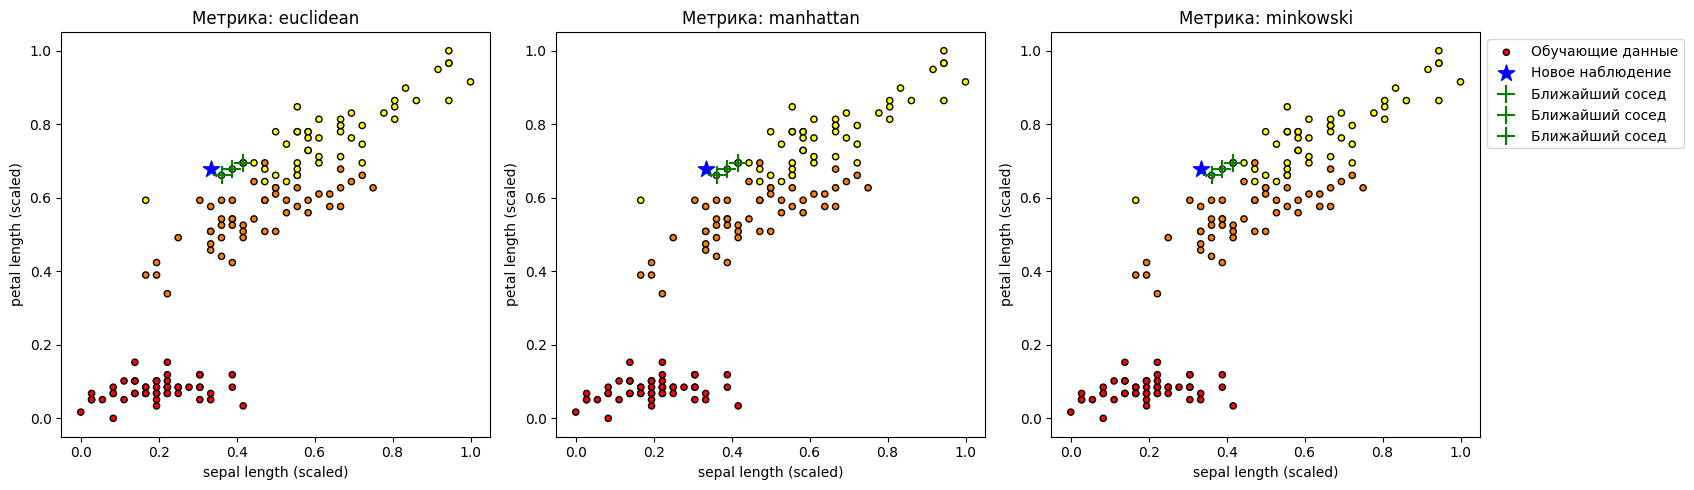

In [20]:
# Новый объект для классификации
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

# Метрики расстояний
metrics = ['euclidean', 'manhattan', 'minkowski']

# Построение графиков для каждой метрики
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    # Обучение модели с выбранной метрикой
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    # Поиск ближайших соседей
    distances, indices = knn.kneighbors(observation_new_scaled)

    # Визуализация
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', edgecolor='k', s=20, label="Обучающие данные")
    ax.scatter(observation_new_scaled[0, 0], observation_new_scaled[0, 1], color='blue', marker='*', s=150, label="Новое наблюдение")

    # Отображение ближайших соседей
    for index in indices[0]:
        ax.scatter(X_scaled[index, 0], X_scaled[index, 1], color='green', marker='+', s=150, label="Ближайший сосед")

    ax.set_title(f"Метрика: {metric}")
    ax.set_xlabel("sepal length (scaled)")
    ax.set_ylabel("petal length (scaled)")

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 5.  Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

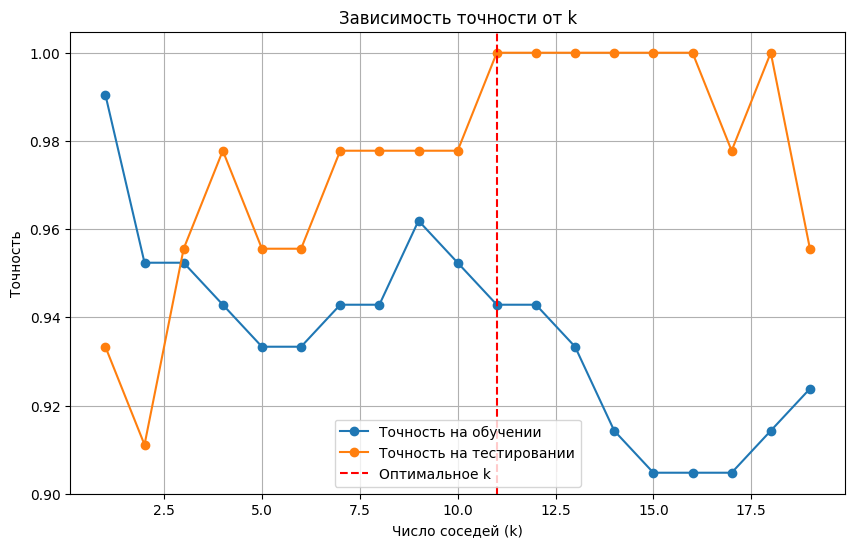

Оптимальное значение k: 11
Точность на тестовой выборке при k=11: 1.00


In [21]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Обучение и оценка модели для разных значений k
k_values = range(1, 20)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Оценка точности
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

# Визуализация зависимости точности от k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Точность на обучении', marker='o')
plt.plot(k_values, test_accuracies, label='Точность на тестировании', marker='o')
plt.axvline(x=k_values[np.argmax(test_accuracies)], color='red', linestyle='--', label='Оптимальное k')
plt.title('Зависимость точности от k')
plt.xlabel('Число соседей (k)')
plt.ylabel('Точность')
plt.legend()
plt.grid()
plt.show()

# Оптимальное значение k и его точность
optimal_k = k_values[np.argmax(test_accuracies)]
optimal_accuracy = max(test_accuracies)

print(f"Оптимальное значение k: {optimal_k}")
print(f"Точность на тестовой выборке при k={optimal_k}: {optimal_accuracy:.2f}")

## 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

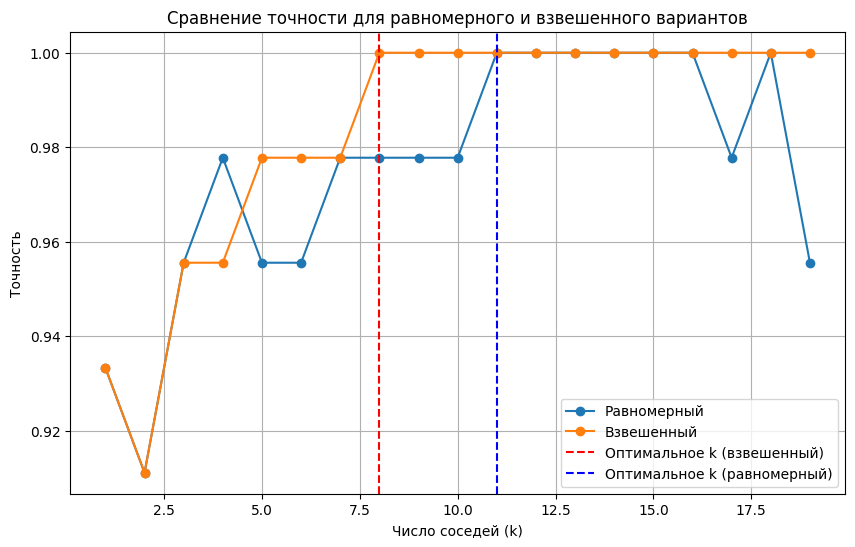

Равномерный алгоритм: k=11, точность=1.00
Взвешенный алгоритм: k=8, точность=1.00


In [22]:
# Обучение и оценка для равномерного и взвешенного вариантов
k_values = range(1, 20)
uniform_accuracies = []
distance_accuracies = []

for k in k_values:
    # Равномерный алгоритм
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    uniform_accuracies.append(accuracy_score(y_test, knn_uniform.predict(X_test)))

    # Взвешенный алгоритм
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    distance_accuracies.append(accuracy_score(y_test, knn_distance.predict(X_test)))

# Визуализация зависимости точности от k
plt.figure(figsize=(10, 6))
plt.plot(k_values, uniform_accuracies, label='Равномерный', marker='o')
plt.plot(k_values, distance_accuracies, label='Взвешенный', marker='o')
plt.axvline(x=k_values[np.argmax(distance_accuracies)], color='red', linestyle='--', label='Оптимальное k (взвешенный)')
plt.axvline(x=k_values[np.argmax(uniform_accuracies)], color='blue', linestyle='--', label='Оптимальное k (равномерный)')
plt.title('Сравнение точности для равномерного и взвешенного вариантов')
plt.xlabel('Число соседей (k)')
plt.ylabel('Точность')
plt.legend()
plt.grid()
plt.show()

# Оптимальные значения k и их точности
optimal_k_uniform = k_values[np.argmax(uniform_accuracies)]
optimal_accuracy_uniform = max(uniform_accuracies)

optimal_k_distance = k_values[np.argmax(distance_accuracies)]
optimal_accuracy_distance = max(distance_accuracies)

print(f"Равномерный алгоритм: k={optimal_k_uniform}, точность={optimal_accuracy_uniform:.2f}")
print(f"Взвешенный алгоритм: k={optimal_k_distance}, точность={optimal_accuracy_distance:.2f}")


# Контрольные вопросы

1. **Чем отличается стандартизация и минимаксная нормализация данных?**
   - Стандартизация преобразует данные так, чтобы среднее значение признаков стало равным нулю, а стандартное отклонение — единице. Минимаксная нормализация приводит данные в диапазон от 0 до 1, основываясь на минимальных и максимальных значениях признаков.
   - Другие методы нормализации включают логарифмическую нормализацию, масштабирование по квантилям и нормализацию на основе медианы. Выбор метода зависит от задачи: для моделей, чувствительных к масштабам (например, KNN), предпочтительна минимаксная нормализация.

2. **В чем смысл параметра k в алгоритме ближайших соседей?**
   - Параметр k определяет количество ближайших соседей, используемых для классификации. Оптимальное значение k выбирается эмпирически, часто с использованием кросс-валидации.

3. **Чем отличается взвешенный и равномерный вариант метода ближайших соседей?**
   - В равномерном варианте все k соседей имеют одинаковый вес при принятии решения. В взвешенном варианте соседям, находящимся ближе, назначается больший вес. Взвешенный вариант предпочтителен, если точки ближе к новому наблюдению обладают большей значимостью.

4. **Почему нормализованное по минимаксному методу значение может быть больше 1?**
   - Это возможно, если новое наблюдение имеет значения, выходящие за пределы диапазона обучающего набора данных.

5. **Что такое метрики расстояния и как они влияют на работу метода ближайших соседей?**
   - Метрики расстояния (например, Евклидова, Манхэттенская, Косинусная) определяют способ вычисления расстояний между точками. Выбор метрики может существенно повлиять на результаты, особенно в задачах с разными типами данных.
